# Decision Trees - Deep Dive

## Decision Tree Classifiers

In [54]:
from sklearn import datasets
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
%matplotlib inline

In [2]:
iris = datasets.load_iris(as_frame=True)

In [3]:
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [4]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [5]:
df = iris.data

In [6]:
df['target'] = iris.target

In [7]:
df['target_names'] = df['target'].apply(lambda y: iris.target_names[y])

In [8]:
df.sample(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_names
130,7.4,2.8,6.1,1.9,2,virginica
12,4.8,3.0,1.4,0.1,0,setosa
34,4.9,3.1,1.5,0.2,0,setosa
14,5.8,4.0,1.2,0.2,0,setosa
50,7.0,3.2,4.7,1.4,1,versicolor


In [9]:
df.drop(columns='target_names', inplace=True)
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [10]:
target  = 'target'
X = df.drop(labels=[target], axis=1)
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.3, 
    random_state=0
)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (105, 4)
X_test shape: (45, 4)
y_train shape: (105,)
y_test shape: (45,)


## Model Training

In [11]:
clf = DecisionTreeClassifier()

In [12]:
clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [13]:
y_pred = clf.predict(X_test)

In [14]:
y_pred

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 2, 1, 1, 2, 0, 2, 0,
       0])

## Evaluating our predictions

In [15]:
accuracy_score(y_test, y_pred)

0.9777777777777777

**Which features did the model find more useful in deciding the iris species?**

In [16]:
fi = pd.DataFrame(
    {
        'feature_names': iris.feature_names,
        'feature_importances': (clf.feature_importances_)*100
    }
).sort_values('feature_importances', ascending=False
             ).set_index('feature_names')

fi

,feature_importances
feature_names,
petal width (cm),58.082584
petal length (cm),39.766951
sepal width (cm),2.150464
sepal length (cm),0.000000


## Displaying the internal tree decisions

In [17]:
from sklearn.tree import export_text

In [18]:
print(export_text(clf,
                  feature_names=iris.feature_names,
                  decimals=1))

|--- petal width (cm) <= 0.8
|   |--- class: 0
|--- petal width (cm) >  0.8
|   |--- petal length (cm) <= 5.0
|   |   |--- petal width (cm) <= 1.7
|   |   |   |--- class: 1
|   |   |--- petal width (cm) >  1.7
|   |   |   |--- sepal width (cm) <= 3.1
|   |   |   |   |--- class: 2
|   |   |   |--- sepal width (cm) >  3.1
|   |   |   |   |--- class: 1
|   |--- petal length (cm) >  5.0
|   |   |--- petal width (cm) <= 1.8
|   |   |   |--- petal width (cm) <= 1.7
|   |   |   |   |--- class: 2
|   |   |   |--- petal width (cm) >  1.7
|   |   |   |   |--- class: 1
|   |   |--- petal width (cm) >  1.8
|   |   |   |--- class: 2



In [19]:
from sklearn.tree import plot_tree

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

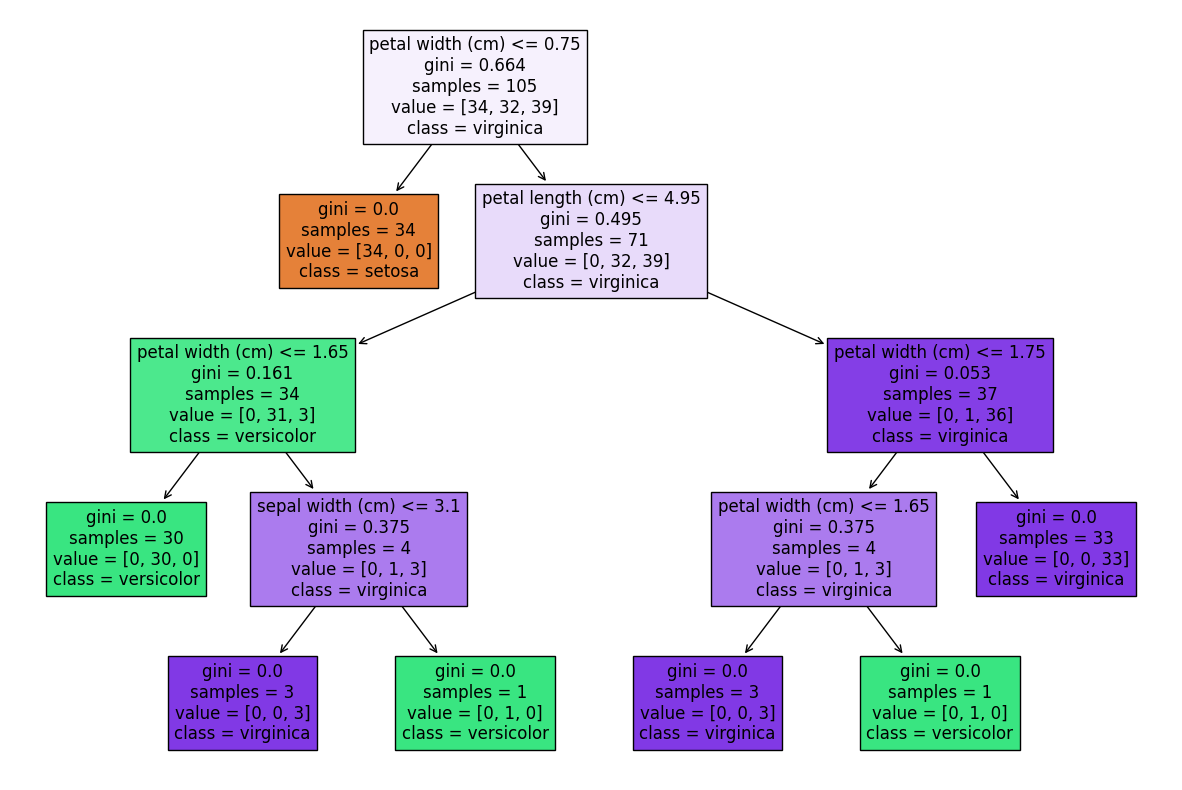

In [20]:
plt.figure(figsize=(15,10))
plot_tree(clf, feature_names=iris.feature_names, 
          filled=True, class_names=iris.target_names)
plt.show()

One Class(setosa) is linearly separable from the other two; the latter are not linearly separable from each other.

Generally, the harder it is to separate classes, the deeper the branching goes.

## Preventing Overfitting

To prevent overfitting, the following settings may be used to limit the growth of a tree:
 - max_depth
 - min_samples_split
 - min_samples_leaf
 - cost_complexity_pruning_path

### What to do to get a more reliable score

In [21]:
accuracy_scores = []
for _ in range(100):
    # At each iteration we freshly split our data
    df_train, df_test = train_test_split(df, test_size=0.3)
    X_train = df_train[iris.feature_names]
    X_test = df_test[iris.feature_names]
    
    y_train = df_train['target']
    y_test = df_test['target']
    
    # We then create a new classifier
    clf = DecisionTreeClassifier()
    
    # and we use it for training and prediction
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    
    # Finally, we append the score to our list
    accuracy_scores.append(round(accuracy_score(y_test, y_pred),3))

In [22]:
accuracy_scores = pd.Series(accuracy_scores)

Average Score: 0.946 [5th percentile: 0.889 & 95th percentile:1.0]


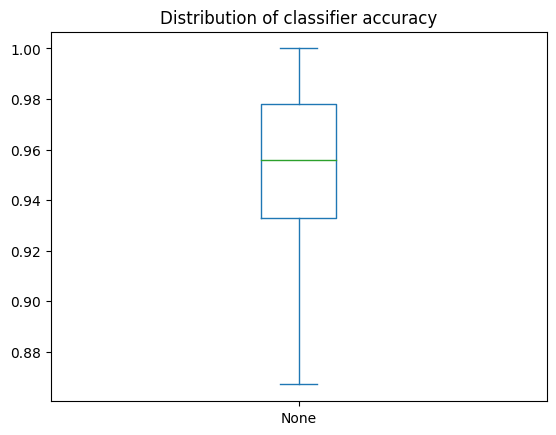

In [23]:
accuracy_scores.plot(
    title='Distribution of classifier accuracy',
    kind='box'
)

print(
    'Average Score: {:.3} \
[5th percentile: {:.3} & 95th percentile:{:.3}]'.format(
        accuracy_scores.mean(),
        accuracy_scores.quantile(0.05),
        accuracy_scores.quantile(0.95)
    )
)

### ShuffleSplit

In [24]:
accuracy_scores = []

from sklearn.model_selection import ShuffleSplit

# Create a shuffle split instance
rs = ShuffleSplit(n_splits=100, test_size=0.3)

# We now get 100 pairs of indices
for train_index, test_index in rs.split(df):
    
    X_train = df.loc[train_index, iris.feature_names]
    X_test = df.loc[test_index, iris.feature_names]
    
    y_train = df.loc[train_index, 'target']
    y_test = df.loc[test_index, 'target']
    
    clf = DecisionTreeClassifier()
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    
    accuracy_scores.append(round(accuracy_score(y_test, y_pred), 3))
    
accuracy_scores = pd.Series(accuracy_scores)

Average Score: 0.947 [5th percentile: 0.889 & 95th percentile:0.978]


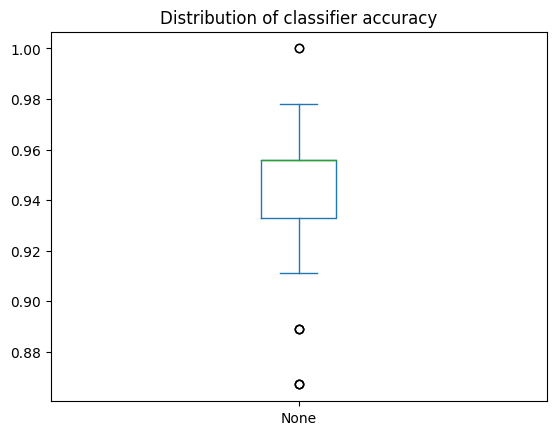

In [25]:
accuracy_scores.plot(
    title='Distribution of classifier accuracy',
    kind='box'
)

print(
    'Average Score: {:.3} \
[5th percentile: {:.3} & 95th percentile:{:.3}]'.format(
        accuracy_scores.mean(),
        accuracy_scores.quantile(0.05),
        accuracy_scores.quantile(0.95)
    )
)

In [26]:
from sklearn.model_selection import cross_validate

In [29]:
clf = DecisionTreeClassifier()
rs = ShuffleSplit(n_splits=100, test_size=0.3)

X = df[iris.feature_names]
y = df['target']

cv_results = cross_validate(
    clf, X, y, cv=rs, scoring='accuracy'
)

accuracy_scores = pd.Series(cv_results['test_score'])

Average Score: 0.951 [5th percentile: 0.889 & 95th percentile:1.0]


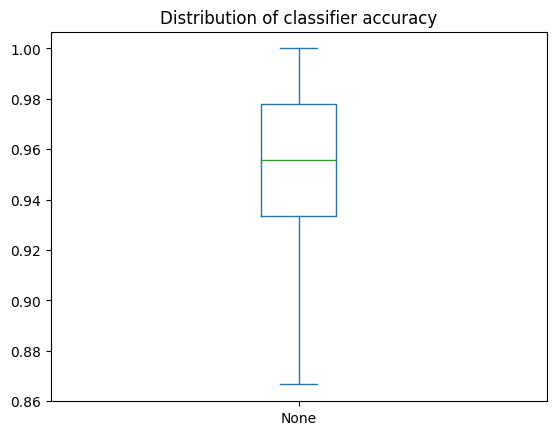

In [32]:
accuracy_scores.plot(
    title='Distribution of classifier accuracy',
    kind='box'
)

print(
    'Average Score: {:.3} \
[5th percentile: {:.3} & 95th percentile:{:.3}]'.format(
        accuracy_scores.mean(),
        accuracy_scores.quantile(0.05),
        accuracy_scores.quantile(0.95)
    )
)

## Tuning the hyperparameters for higher accuracy

In [34]:
df_train, df_test = train_test_split(df, test_size=0.25)

X_train = df_train[iris.feature_names]
X_test = df_test[iris.feature_names]

y_train = df_train['target']
y_test = df_test['target']

In [36]:
for max_depth in [1, 2, 3, 4]:
    
    # We initialize a new classifier each iteration with different
    # max_depth
    
    clf = DecisionTreeClassifier(max_depth=max_depth)
    
    # We also initialize our shuffle splitter
    rs = ShuffleSplit(n_splits=20, test_size=0.25)
    
    cv_results = cross_validate(
        clf, X_train, y_train, cv=rs, scoring='accuracy'
    )
    accuracy_scores = pd.Series(cv_results['test_score'])

    print(
     '@ max_depth = {}: accuracy_scores: {}~{}'.format(
     max_depth,
     accuracy_scores.quantile(.1).round(3),
     accuracy_scores.quantile(.9).round(3)
     )
 )


@ max_depth = 1: accuracy_scores: 0.564~0.75
@ max_depth = 2: accuracy_scores: 0.921~1.0
@ max_depth = 3: accuracy_scores: 0.925~1.0
@ max_depth = 4: accuracy_scores: 0.889~1.0


We can clearly see that a single-level tree (usually called a stub) is not as accurate as deeper trees.

## Visualizing the tree's decision boundaries

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [39]:
def plot_decision_boundary(clf, x, y):
    feature_names = x.columns
    x, y = x.values, y.values
    x_min, x_max = x[:,0].min(), x[:,0].max()
    y_min, y_max = x[:,1].min(), x[:,1].max()
    step = 0.02
    xx, yy = np.meshgrid(
    np.arange(x_min, x_max, step),
    np.arange(y_min, y_max, step)
    )
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.figure(figsize=(12,8))
    plt.contourf(xx, yy, Z, cmap='Paired_r', alpha=0.25)
    plt.contour(xx, yy, Z, colors='k', linewidths=0.7)
    plt.scatter(x[:,0], x[:,1], c=y, edgecolors='k')
    plt.title("Tree's Decision Boundaries")
    plt.xlabel(feature_names[0])
    plt.ylabel(feature_names[1])

C:\Users\vamsh\miniconda3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"


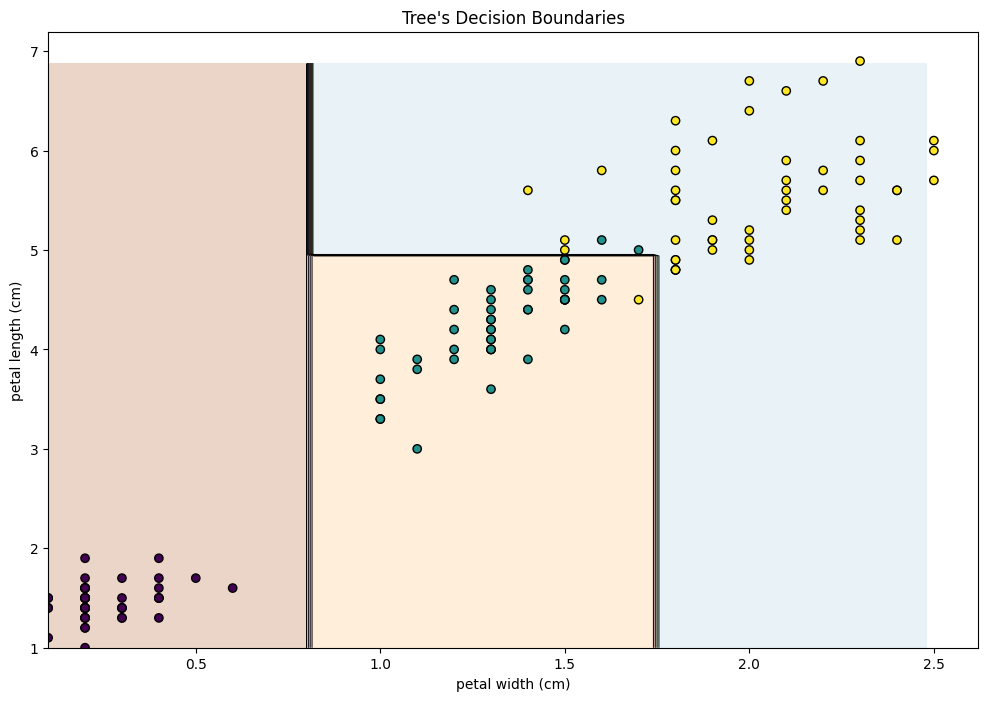

In [40]:
x = df[['petal width (cm)', 'petal length (cm)']]
y = df['target']

clf = DecisionTreeClassifier(max_depth=3)
clf.fit(x, y)

plot_decision_boundary(clf, x, y)

In [43]:
df['petal length x width (cm)'] = df['petal length (cm)'] * df['petal width (cm)']
df['sepal length x width (cm)'] = df['sepal length (cm)'] * df['sepal width (cm)']

C:\Users\vamsh\miniconda3\lib\site-packages\ipykernel_launcher.py:16: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


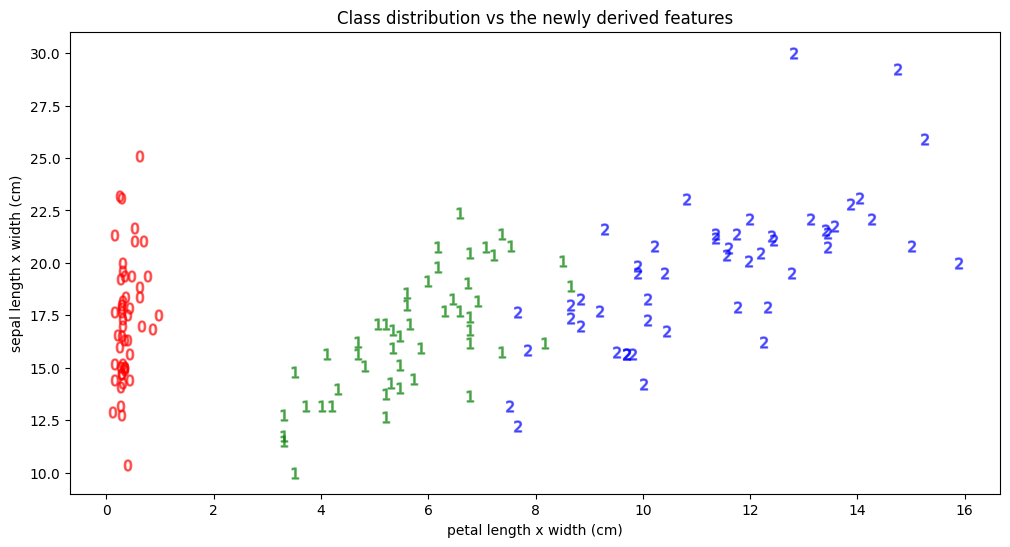

In [44]:
fig, ax = plt.subplots(1, 1, figsize=(12, 6));
h_label = 'petal length x width (cm)'
v_label = 'sepal length x width (cm)'
for c in df['target'].value_counts().index.tolist():
         df[df['target'] == c].plot(
         title='Class distribution vs the newly derived features',
         kind='scatter',
         x=h_label,
         y=v_label,
         color=['r', 'g', 'b'][c], # Each class different color
         marker=f'${c}$', # Use class id as marker
         s=64,
         alpha=0.5,
         ax=ax,
 )
fig.show()

In [48]:
features_orig = iris.feature_names
features_new = ['petal length x width (cm)', 'sepal length x width (cm)']
accuracy_scores_orig = []
accuracy_scores_new = []
for _ in range(500):
        df_train, df_test = train_test_split(df, test_size=0.3)
        x_train_orig = df_train[features_orig]
        x_test_orig = df_test[features_orig]
        x_train_new = df_train[features_new]
        x_test_new = df_test[features_new]
        y_train = df_train['target']
        y_test = df_test['target']
        clf_orig = DecisionTreeClassifier(max_depth=2)
        clf_new = DecisionTreeClassifier(max_depth=2)
        clf_orig.fit(x_train_orig, y_train)
        clf_new.fit(x_train_new, y_train)
        y_pred_orig = clf_orig.predict(x_test_orig)
        y_pred_new = clf_new.predict(x_test_new)
        accuracy_scores_orig.append(round(accuracy_score(y_test, y_pred_orig),
        3))
        accuracy_scores_new.append(round(accuracy_score(y_test, y_pred_new),
        3))

accuracy_scores_orig = pd.Series(accuracy_scores_orig)
accuracy_scores_new = pd.Series(accuracy_scores_new)

C:\Users\vamsh\miniconda3\lib\site-packages\ipykernel_launcher.py:14: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


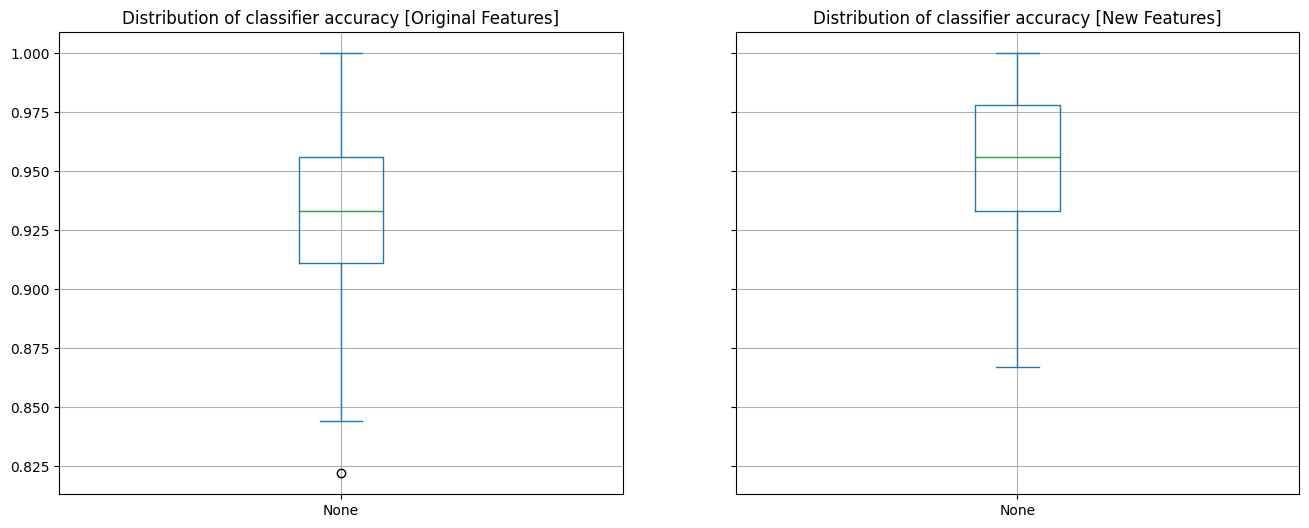

In [49]:
fig, axs = plt.subplots(1, 2, figsize=(16, 6), sharey=True);
accuracy_scores_orig.plot(
 title='Distribution of classifier accuracy [Original Features]',
 kind='box',
 grid=True,
 ax=axs[0]
)
accuracy_scores_new.plot(
 title='Distribution of classifier accuracy [New Features]',
 kind='box',
 grid=True,
 ax=axs[1]
)
fig.show()

## Decision Tree Regressors

In [50]:
n = 200

# From each population we get 200 male and 200 female samples
height_pop1_f = np.random.normal(loc=155, scale=4, size=n)
height_pop1_m = np.random.normal(loc=175, scale=5, size=n)
height_pop2_f = np.random.normal(loc=165, scale=15, size=n)
height_pop2_m = np.random.normal(loc=185, scale=12, size=n)

#  We group all females together and all males together
height_f = np.concatenate([height_pop1_f, height_pop2_f])
height_m = np.concatenate([height_pop1_m, height_pop2_m])

df_height = pd.DataFrame(
    {
     'Gender': [1 for i in range(height_f.size)] +
     [2 for i in range(height_m.size)],
     'Height': np.concatenate((height_f, height_m))
    }
)

C:\Users\vamsh\miniconda3\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  # This is added back by InteractiveShellApp.init_path()


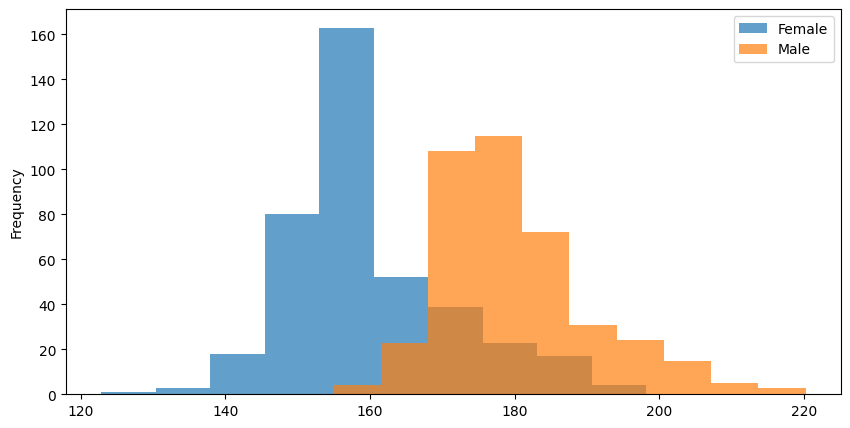

In [55]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
df_height[df_height['Gender'] == 1]['Height'].plot(
    label='Female', kind='hist',
    bins=10, alpha=0.7, ax=ax
)
df_height[df_height['Gender'] == 2]['Height'].plot(
    label='Male', kind='hist',
    bins=10, alpha=0.7, ax=ax
)
ax.legend()
fig.show()

In [56]:
df_height.groupby('Gender')[['Height']].agg([np.mean, np.median]).round(1)

Height       
         mean median
Gender              
1       159.8  157.0
2       180.2  178.1

In [57]:
df_train, df_test = train_test_split(df_height, test_size=0.3)
x_train, x_test = df_train[['Gender']], df_test[['Gender']]
y_train, y_test = df_train['Height'], df_test['Height']

In [58]:
from sklearn.tree import DecisionTreeRegressor, export_text

In [62]:
for criterion in ['squared_error','absolute_error']:
    rgrsr = DecisionTreeRegressor(criterion=criterion)
    rgrsr.fit(x_train, y_train)
    
    print(f"Criterion={criterion}:\n")
    print(export_text(rgrsr, feature_names=['Gender'],decimals=1))

Criterion=squared_error:

|--- Gender <= 1.5
|   |--- value: [159.8]
|--- Gender >  1.5
|   |--- value: [180.6]

Criterion=absolute_error:

|--- Gender <= 1.5
|   |--- value: [157.1]
|--- Gender >  1.5
|   |--- value: [178.3]



In [64]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
y_test_pred = rgrsr.predict(x_test)
print('MSE:', mean_squared_error(y_test, y_test_pred))
print('MAE:', mean_absolute_error(y_test, y_test_pred))

MSE: 126.72951248642366
MAE: 8.029173479746534


### Setting sample weights

In [66]:
rgrsr = DecisionTreeRegressor(criterion='squared_error')
sample_weight = y_train.apply(lambda h: 10 if h>150 else 1)
rgrsr.fit(x_train, y_train, sample_weight=sample_weight)
print(export_text(rgrsr, feature_names=['Gender'],decimals=1))

|--- Gender <= 1.5
|   |--- value: [161.7]
|--- Gender >  1.5
|   |--- value: [180.6]

